<a href="https://colab.research.google.com/github/jeanraisa/Air_Quality_Forecasting/blob/main/Air_Quality_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LayerNormalization


In [29]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/air_quality_forcasting/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [31]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [32]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv
0,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,2013-07-02 04:00:00,1.448138,-0.732019,-0.522096
1,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,2013-07-02 05:00:00,1.448138,-0.732019,-0.522096
2,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,2013-07-02 06:00:00,1.448138,-0.732019,-0.522096
3,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,2013-07-02 07:00:00,1.448138,-0.732019,-0.522096
4,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,2013-07-02 08:00:00,1.448138,-0.732019,-0.522096


In [33]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'datetime', 'cbwd_NW',
       'cbwd_SE', 'cbwd_cv', 'pm2.5'],
      dtype='object')

In [34]:
# Check for the data types of each column
print("\nData types of each column:")
print(train.dtypes)


Data types of each column:
No            int64
DEWP        float64
TEMP        float64
PRES        float64
Iws         float64
Is          float64
Ir          float64
datetime     object
cbwd_NW     float64
cbwd_SE     float64
cbwd_cv     float64
pm2.5       float64
dtype: object


In [35]:
# get a summary of the data set
print("\nSummary of the dataset:")

print(train.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30676 entries, 0 to 30675
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        30676 non-null  int64  
 1   DEWP      30676 non-null  float64
 2   TEMP      30676 non-null  float64
 3   PRES      30676 non-null  float64
 4   Iws       30676 non-null  float64
 5   Is        30676 non-null  float64
 6   Ir        30676 non-null  float64
 7   datetime  30676 non-null  object 
 8   cbwd_NW   30676 non-null  float64
 9   cbwd_SE   30676 non-null  float64
 10  cbwd_cv   30676 non-null  float64
 11  pm2.5     28755 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.8+ MB
None


In [36]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(train.describe())


Descriptive statistics for numerical columns:
                 No          DEWP          TEMP          PRES           Iws  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean   15338.500000     -0.029431     -0.062712      0.013612      0.030542   
std     8855.542765      0.994087      1.015193      1.008991      1.018337   
min        1.000000     -2.135153     -2.578070     -2.380821     -0.468688   
25%     7669.750000     -0.888034     -0.938521     -0.822670     -0.441894   
50%    15338.500000     -0.056622      0.045209     -0.043595     -0.352512   
75%    23007.250000      0.913358      0.864984      0.832865      0.005216   
max    30676.000000      1.814055      2.340578      2.877939     11.231956   

                 Is            Ir       cbwd_NW       cbwd_SE       cbwd_cv  \
count  30676.000000  30676.000000  30676.000000  30676.000000  30676.000000   
mean       0.016992      0.011253      0.016193      0.005833     -0.025008   
std 

In [37]:
# Check for missing values
print("\nMissing values in each column:")
print(train.isnull().sum())



Missing values in each column:
No             0
DEWP           0
TEMP           0
PRES           0
Iws            0
Is             0
Ir             0
datetime       0
cbwd_NW        0
cbwd_SE        0
cbwd_cv        0
pm2.5       1921
dtype: int64


**Visualization For Training Data**

In [38]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)

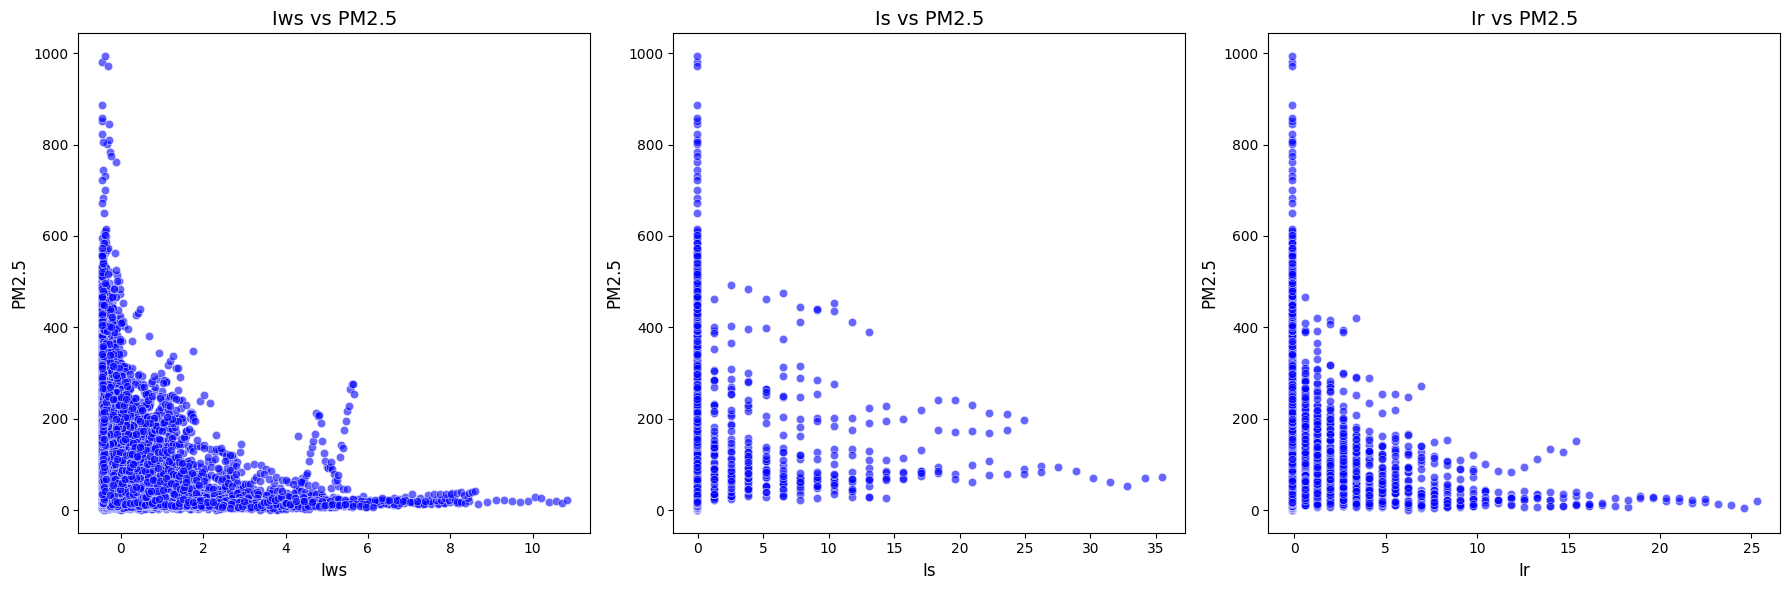

In [39]:
# Scatter plots for wind metrics vs. pm2.5 for relationships between wind speed metrics (Iws, Is, Ir) and pm2.5
wind_metrics = ['Iws', 'Is', 'Ir']

# Set up the plotting environment
plt.figure(figsize=(18, 6))
for i, metric in enumerate(wind_metrics, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=train, x=metric, y='pm2.5', alpha=0.6, color='blue')
    plt.title(f"{metric} vs PM2.5", fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel("PM2.5", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

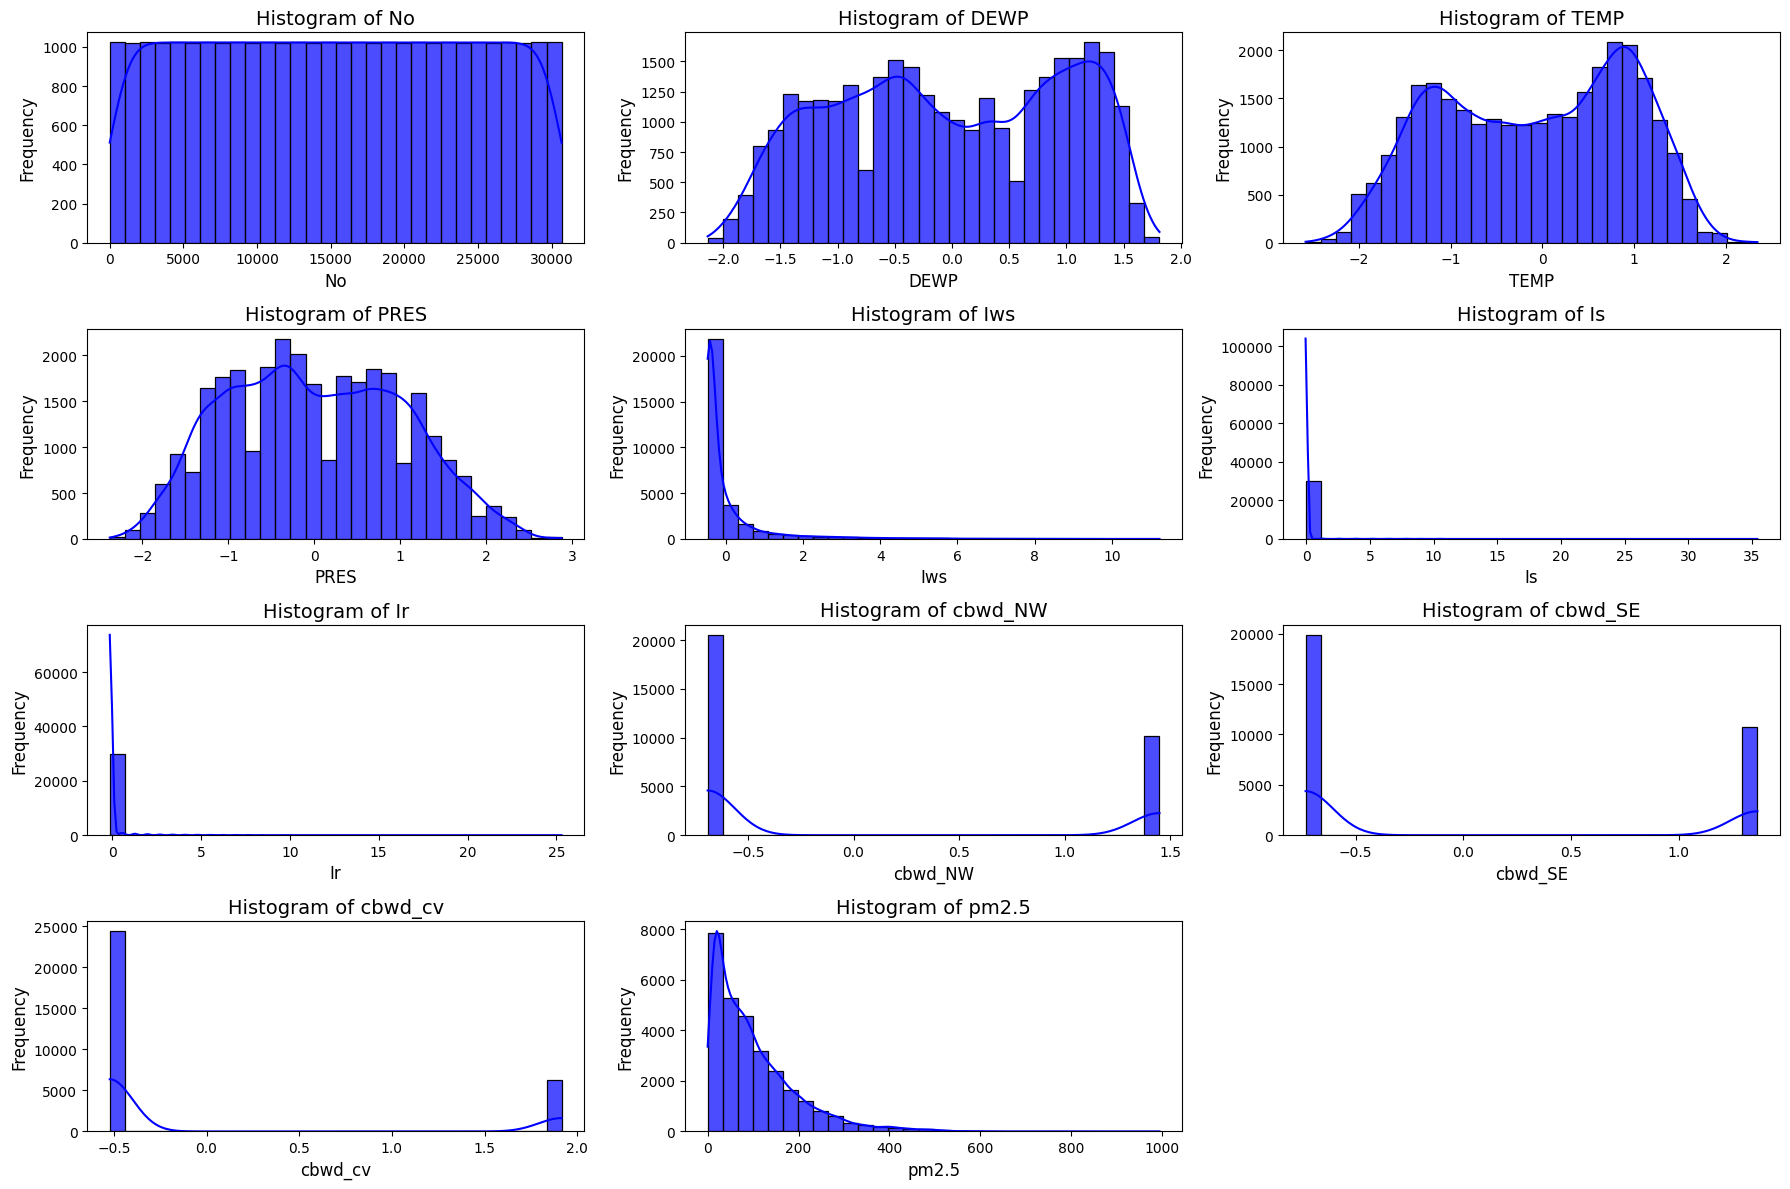

In [40]:
# Distribution of numerical variables with histogram
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting environment
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)  # Create a grid layout
    sns.histplot(train[column], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f"Histogram of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

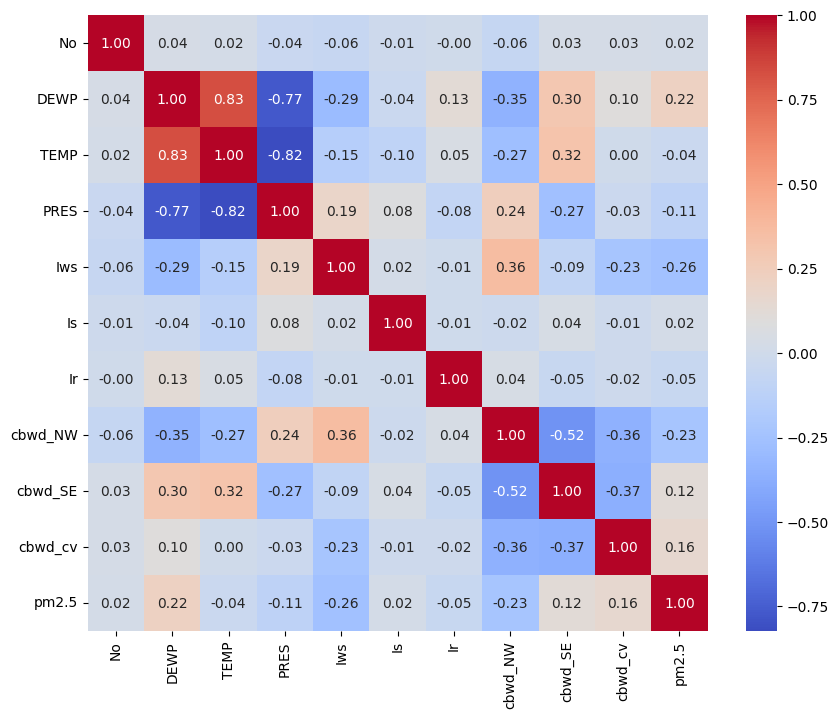

In [41]:
#Examaning a corelation matrix of all the features
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show

# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [42]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


In [43]:
test.isnull().sum()

,0
No,0
DEWP,0
TEMP,0
PRES,0
Iws,0
Is,0
Ir,0
cbwd_NW,0
cbwd_SE,0
cbwd_cv,0


# Separate features and target

- Feel free to drop any non-essential columns like that you think might not contribute to modeling.

In [44]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [45]:
X_train

,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,
2010-01-01 00:00:00,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 01:00:00,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 02:00:00,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 03:00:00,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2010-01-01 04:00:00,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
...,...,...,...,...,...,...,...,...,...
2013-07-01 23:00:00,1.467633,0.946961,-2.088668,-0.415099,-0.069353,2.687490,-0.690542,-0.732019,-0.522096
2013-07-02 00:00:00,1.329064,0.864984,-2.186052,-0.379306,-0.069353,3.393779,1.448138,-0.732019,-0.522096
2013-07-02 01:00:00,1.259780,0.701029,-2.088668,-0.263130,-0.069353,4.100068,1.448138,-0.732019,-0.522096


In [46]:
y_train

,pm2.5
datetime,
2010-01-01 00:00:00,100.793427
2010-01-01 01:00:00,100.793427
2010-01-01 02:00:00,100.793427
2010-01-01 03:00:00,100.793427
2010-01-01 04:00:00,100.793427
...,...
2013-07-01 23:00:00,50.000000
2013-07-02 00:00:00,41.000000
2013-07-02 01:00:00,32.000000


In [47]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

In [48]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))

# Reshape the scaled data back to the original shape
X_train_scaled = X_train_scaled.reshape(X_train.shape)

# Now X_train_scaled contains the scaled training data
X_train_scaled

array([[[0.14035088, 0.13333333, 0.53703704, ..., 1.        ,
         0.        , 0.        ]],

       [[0.14035088, 0.11666667, 0.51851852, ..., 1.        ,
         0.        , 0.        ]],

       [[0.14035088, 0.13333333, 0.5       , ..., 1.        ,
         0.        , 0.        ]],

       ...,

       [[0.85964912, 0.66666667, 0.05555556, ..., 1.        ,
         0.        , 0.        ]],

       [[0.84210526, 0.66666667, 0.05555556, ..., 1.        ,
         0.        , 0.        ]],

       [[0.84210526, 0.66666667, 0.03703704, ..., 1.        ,
         0.        , 0.        ]]])

# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [49]:
# define model
model_1 = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)

])

# Compile the model
model_1.compile(
    optimizer= Adam(learning_rate=0.005),
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

#early_stopping= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Display the model architecture
model_1.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,177 (477.25 KB)

 Trainable params: 122,177 (477.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model_1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    #callbacks=[early_stopping]
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - lambda: 83.2951 - loss: 7549.8750
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - lambda: 73.0022 - loss: 5645.9458
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - lambda: 70.1578 - loss: 5189.0562
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - lambda: 70.4431 - loss: 5237.2720
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - lambda: 70.8460 - loss: 5353.5625
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - lambda: 71.2771 - loss: 5382.5464
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 70.4707 - loss: 5278.3774
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - lambda: 70.3906 - loss: 5219.3755
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - lambda: 70.1859 - loss: 5235.4121
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - lambda: 69.0931 - loss: 5038.5381
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - lambda: 70.1763 - loss: 5187.6548
Epoch 12/20
959/959 ━━━━━━

959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


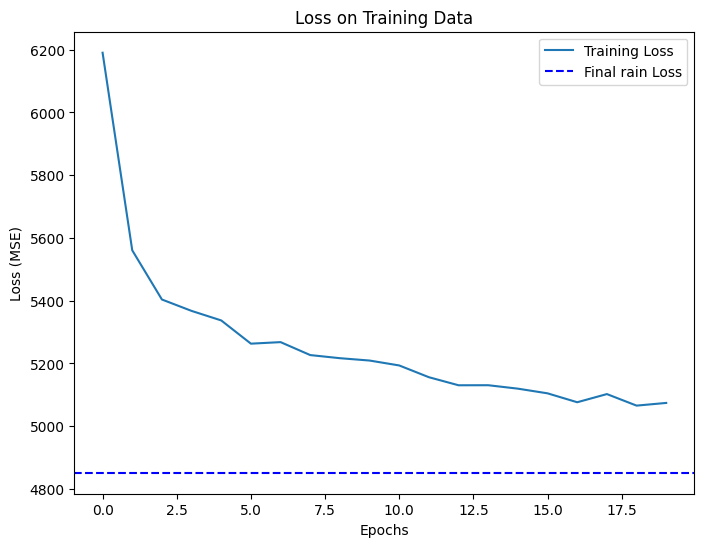

Final Training Loss (MSE): 4851.7086750069
Training Loss (RMSE): 69.65420787724817


In [51]:
# Calculate training loss
train_predictions = model_1.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)
train_loss_rmse = np.sqrt(train_loss)


# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")
print(f"Training Loss (RMSE): {train_loss_rmse}")

In [52]:
test.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NW,cbwd_SE,cbwd_cv
datetime,,,,,,,,,,
2013-07-02 04:00:00,30677,1.190496,0.701029,-2.186052,-0.003982,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 05:00:00,30678,1.121211,0.619051,-2.186052,0.031811,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 06:00:00,30679,1.190496,0.783006,-2.186052,0.094398,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 07:00:00,30680,1.190496,0.946961,-2.088668,0.174782,-0.069353,-0.137667,1.448138,-0.732019,-0.522096
2013-07-02 08:00:00,30681,1.190496,1.192893,-1.991283,0.210575,-0.069353,-0.137667,1.448138,-0.732019,-0.522096


In [53]:
# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model_1.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/air_quality_forcasting/All.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
